Desafio 26: Análise de Vendas por Loja e Produto

📂 Dataset: Informações de vendas por produto, loja e mês, com dados de valores inconsistentes.
Colunas: Loja, Produto, Mês, Quantidade_Vendida, Valor_Total_Venda

🎯 Tarefas:

    Trate a coluna Valor_Total_Venda, convertendo-a para numérico e lidando com valores inválidos como "erro" ou "".

    Calcule o total de vendas por loja.

    Identifique o produto mais vendido (em quantidade) no mês de Março.

    Mostre a média de valor de venda por tipo de produto.

    Crie um gráfico de barras com o total de vendas por loja.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("dia_26_vendas_lojas.csv")
df.head()

,Loja,Produto,Mês,Quantidade_Vendida,Valor_Total_Venda
0,Loja D,Teclado,Abr,55,1400.0
1,Loja C,Notebook,Fev,93,5700.0
2,Loja D,Teclado,Jan,9,3400.0
3,Loja D,Teclado,Mar,56,3800.0
4,Loja B,Notebook,Jun,81,100.0


In [35]:
#Trate a coluna Valor_Total_Venda, convertendo-a para numérico e lidando com valores inválidos como "erro" ou "".
df["Valor_Total_Venda"] = pd.to_numeric(df["Valor_Total_Venda"], errors="coerce")


array([False,  True])

In [37]:
#Calcule o total de vendas por loja.
vendasLoja = df.groupby("Loja")["Valor_Total_Venda"].sum()
print(vendasLoja.to_string())

Loja
Loja A    180200.0
Loja B    239600.0
Loja C    234100.0
Loja D    208100.0


In [46]:
#Identifique o produto mais vendido (em quantidade) no mês de Março.
marco = df[df["Mês"] == "Mar"]
produtoMarco = marco.groupby("Produto")["Quantidade_Vendida"].sum().sort_values(ascending=False)
print(f"O produto mais vendido em Março foi: {produtoMarco.idxmax()} com {produtoMarco.max()} unidades.")

O produto mais vendido em Março foi: Mouse com 425 unidades.


In [49]:
#Mostre a média de valor de venda por tipo de produto.
mediaVendaProduto = df.groupby("Produto")["Valor_Total_Venda"].mean().round(2)
print(mediaVendaProduto.sort_values(ascending=False))

Produto
Monitor       5426.92
Notebook      5285.71
Smartphone    5214.29
Teclado       4888.46
Tablet        4568.18
Mouse         4386.49
Name: Valor_Total_Venda, dtype: float64


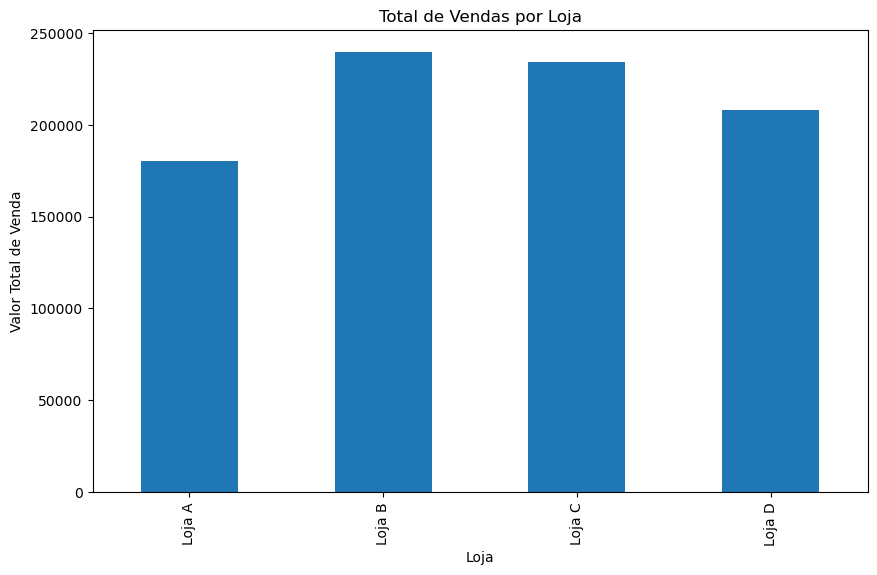

In [55]:
#Crie um gráfico de barras com o total de vendas por loja.
plt.figure(figsize=(10, 6))
vendasLoja.plot(kind='bar')
plt.title("Total de Vendas por Loja")
plt.xlabel("Loja")
plt.ylabel("Valor Total de Venda")
plt.show()